# 設定

In [ ]:
!pip install japanize-matplotlib

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import cauchy
import scipy.special as sp
import matplotlib.pyplot as plt
import seaborn as sns 
import japanize_matplotlib
%matplotlib inline

# 図4.1

In [3]:
gfr = pd.read_csv("/content/gfr.txt",names=["gfr"])

In [4]:
gfr.head()

,gfr
0,108
1,91
2,62
3,59
4,84


In [6]:
#(4.6)の最尤推定量
theta_hat = gfr.mean()
sigma_hat = np.sqrt((np.sum([(i-theta_hat)**2 for i in gfr['gfr']]))/len(gfr))
print(f"theta_hat:{theta_hat}, sigma_hat: {sigma_hat}")

theta_hat:gfr    54.265403
dtype: float64, sigma_hat: 13.6883278607888


In [9]:
#(4.7)の最尤推定量
nu_hat, lambda_hat, sigma_hat1 = gamma.fit(gfr['gfr'])
print(" lambda_hat: {0}, sigma_hat: {1}, nu_hat: {2}".format(lambda_hat , sigma_hat1,nu_hat))

 lambda_hat: 21.11149843336916, sigma_hat: 5.383233562569158, nu_hat: 6.158734063001189


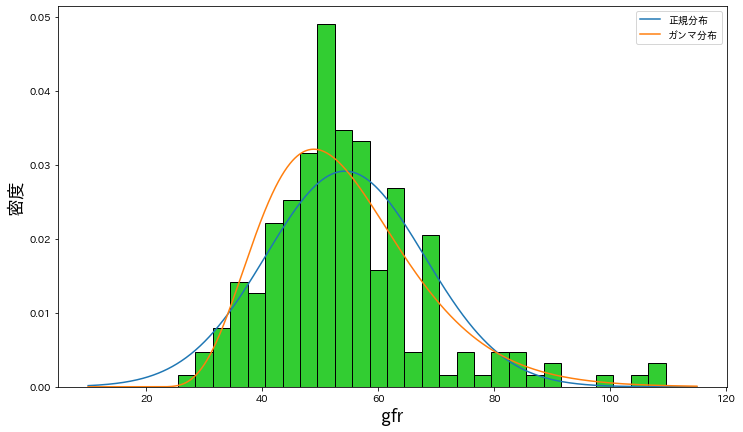

In [11]:
n=len(gfr)
fig, ax = plt.subplots(figsize=(12, 7))
x=np.arange(10,115,0.1)
y=norm.pdf(x, loc=theta_hat, scale=sigma_hat)
yy = gamma.pdf(x, nu_hat, loc=lambda_hat, scale=sigma_hat1)
ax.hist(gfr['gfr'], bins = np.arange(13.5, 112, 3), edgecolor="k", color="limegreen",density=True)
ax.set_xlabel("gfr", size=18)
ax.set_ylabel("密度", size=18)
ax.plot(x,y, label='正規分布')
ax.plot(x,yy, label='ガンマ分布')
ax.legend()

# 図4.2

$\displaystyle I(x) = - \ddot{l}_x(\theta) =- \frac{\partial^2}{\partial \theta^2} \log f_{\theta}(x) \large |_{\hat{\theta}} $

$\displaystyle \log f_{\theta}(x) =\sum_{i=1}^{n} \{-\log \pi -\log(1+(x_i-\theta)^2)\} $

$\displaystyle \frac{\partial}{\partial \theta} \log f_{\theta}(x) = \sum_{i=1}^{20} \frac{2(x_i-\theta)}{1+(x_i-\theta)^2}  $

$\displaystyle \frac{\partial^2}{\partial \theta^2} \log f_{\theta}(x) = \sum_{i=1}^{20} \frac{(x_i-\theta)^2-1}{\{1+(x_i-\theta)^2\}^2}  $


In [29]:
def I(x,th_hat):
  S = 0
  for i in range(20):
    S += ((x[i]-th_hat)**2-1)/((1+(x[i]-th_hat)**2)**2)
  return -S

In [31]:
theta_hat = []
I_inv = []
for j in range(10000):
  x = cauchy.rvs(size=20)
  th_hat,sigma_hat = cauchy.fit(x)
  u = I(x,th_hat)
  theta_hat.append(th_hat)
  I_inv.append(1/u)

In [32]:
df = pd.DataFrame(data={"theta_hat": theta_hat, "1/I(x)":I_inv})

In [33]:
df.head()

,theta_hat,1/I(x)
0,0.092774,0.102113
1,0.278624,0.389927
2,-0.214165,0.144359
3,-0.386378,0.145999
4,-0.331275,0.328056


In [34]:
df = df.sort_values(by='1/I(x)')

In [35]:
df.head()

,theta_hat,1/I(x)
982,-0.377758,-12842.560792
6191,0.813527,-16.131556
648,-0.402875,-10.145631
8718,0.999238,-9.010157
2032,-1.573233,-5.197158


In [37]:
sum(df['1/I(x)']<0)

12

In [38]:
var_1 = df[0:500]['theta_hat'].var()
var_2 = df[501:1500]['theta_hat'].var()
var_3 = df[1501:2500]['theta_hat'].var()
var_4 = df[2501:3500]['theta_hat'].var()
var_5 = df[3501:4500]['theta_hat'].var()
var_6 = df[4501:5500]['theta_hat'].var()
var_7 = df[5501:6500]['theta_hat'].var()
var_8 = df[6501:7500]['theta_hat'].var()
var_9 = df[7501:8500]['theta_hat'].var()
var_10 = df[8501:9500]['theta_hat'].var()
var_11 = df[9501:10000]['theta_hat'].var()

In [39]:
ix_1 = df[0:500]['1/I(x)'].mean()
ix_2 = df[501:1500]['1/I(x)'].mean()
ix_3 = df[1501:2500]['1/I(x)'].mean()
ix_4 = df[2501:3500]['1/I(x)'].mean()
ix_5 = df[3501:4500]['1/I(x)'].mean()
ix_6 = df[4501:5500]['1/I(x)'].mean()
ix_7 = df[5501:6500]['1/I(x)'].mean()
ix_8 = df[6501:7500]['1/I(x)'].mean()
ix_9 = df[7501:8500]['1/I(x)'].mean()
ix_10 = df[8501:9500]['1/I(x)'].mean()
ix_11 = df[9501:10000]['1/I(x)'].mean()

(0.0, 0.25)

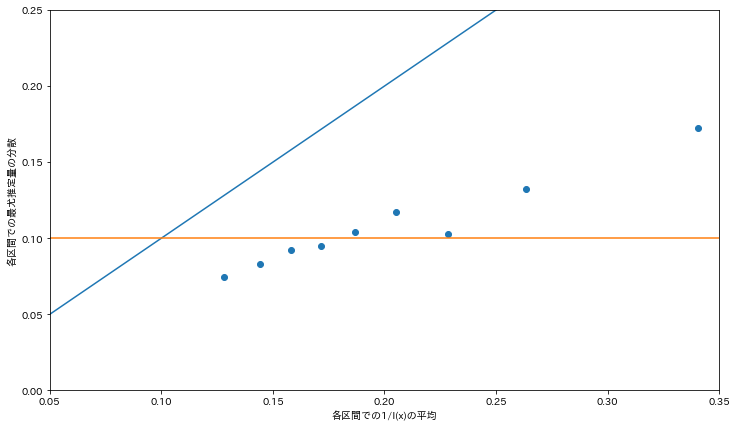

In [41]:
Var = [var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11]
iix = [ix_1,ix_2,ix_3,ix_4,ix_5,ix_6,ix_7,ix_8,ix_9,ix_10,ix_11]

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(iix,Var)
ax.set_xlabel('各区間での1/I(x)の平均')
ax.set_ylabel('各区間での最尤推定量の分散')
x=np.arange(0,0.6,0.01)
ax.plot(x,x)
y=[0.1]*60
ax.plot(x,y)
ax.set_xlim(0.05,0.35)
ax.set_ylim(0,0.25)

# 図4.3

In [42]:
leukemia = pd.read_csv("/content/leukemia_big.csv")

In [43]:
leukemia.head()

,ALL,ALL.1,ALL.2,ALL.3,ALL.4,ALL.5,ALL.6,ALL.7,ALL.8,ALL.9,...,AML.15,AML.16,AML.17,AML.18,AML.19,AML.20,AML.21,AML.22,AML.23,AML.24
0,-1.533622,-0.867610,-0.433172,-1.671903,-1.187689,-1.127234,-1.045409,-0.106917,-1.198796,-1.190899,...,-0.436650,-1.274708,-0.681458,-0.876610,-0.624022,-0.431628,-1.435259,-0.671954,-1.013161,-0.969482
1,-1.235673,-1.275501,-1.184492,-1.596424,-1.335256,-1.113730,-0.800880,-0.745177,-0.849312,-1.190899,...,-0.915483,-1.354363,-0.653559,-1.096250,-1.066594,-1.335256,-1.204586,-0.751457,-0.889592,-1.080988
2,-0.333983,0.375927,-0.459196,-1.422571,-0.797493,-1.362768,-0.671954,-1.175674,0.320813,0.646610,...,-0.736156,-0.022153,-0.037455,-0.567335,-1.100749,-0.552938,-0.948874,-0.231657,-0.742163,-0.779500
3,0.488702,0.444011,0.436264,0.193353,0.235632,-0.360312,0.184941,0.425653,0.333983,0.235270,...,0.083781,0.356562,0.416241,0.533986,0.227505,0.416816,0.408202,0.326556,0.361813,0.298864
4,-1.300893,-1.229660,-1.325882,-1.818329,-1.311206,-1.513975,-1.651624,-1.339555,-0.593132,0.133302,...,-1.547444,-1.264475,-1.512318,-1.469583,-1.283472,-0.977672,-1.090178,-1.545120,-1.174272,-1.443183


In [44]:
leukemia_136 = leukemia.iloc[135]

In [49]:
len(leukemia_136)

72

In [52]:
def t_stats(a_list,b_list):
  n_1=len(a_list)
  n_2=len(b_list)
  sigma_hat=np.sqrt((n_1*a_list.var()+n_2*b_list.var())/(n_1+n_2-2))
  sd_hat=sigma_hat*np.sqrt(1/n_1+1/n_2)
  t= (a_list.mean()-b_list.mean())/sd_hat
  return t

In [53]:
B=10000
t_list = []
for i in range(B):
  a_47 = leukemia_136.sample(47)
  b_25 = leukemia_136.sample(25)
  t = t_stats(a_47,b_25)
  t_list.append(t)

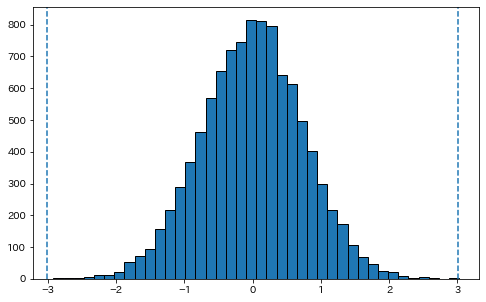

In [65]:
fig , ax = plt.subplots(figsize=(8,5))
ax.hist(t_list,bins=40,edgecolor="k")
ax.axvline(x=-3.01, linestyle='dashed')
ax.axvline(x=3.01, linestyle='dashed')

In [66]:
sum(np.abs(t_list)>3.01)

1